<a href="https://colab.research.google.com/github/varshinihebbal/ElevateLabs_EDA_Task6/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the Iris dataset
df = pd.read_csv("Iris.csv")

# Display the first 5 rows to confirm the load
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Drop the 'Id' column as it is just an index
df = df.drop('Id', axis=1)

# Features (X) are all columns except 'Species'
X = df.drop('Species', axis=1).values

# Target (y) is the 'Species' column
y = df['Species'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 105
Testing set size: 45


In [5]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nFeatures are now normalized.")


Features are now normalized.


In [6]:
# List to hold the error rate for each K
error_rate = []

# Test K from 1 to 25
for i in range(1, 26):
    # Initialize KNN Classifier with i neighbors
    knn = KNeighborsClassifier(n_neighbors=i)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on the test set
    pred_i = knn.predict(X_test)

    # Calculate the error rate (1 - Accuracy) and append to list
    error_rate.append(np.mean(pred_i != y_test))

print("Error rate calculation complete.")

Error rate calculation complete.


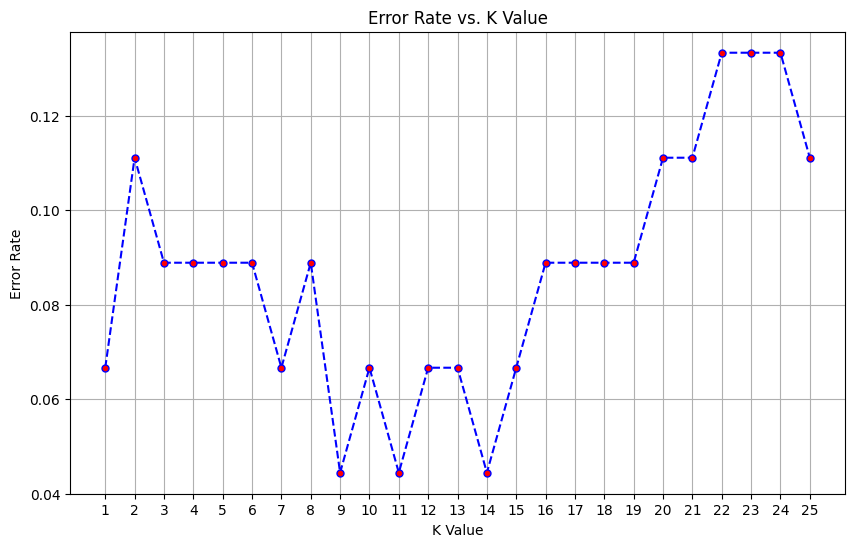

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, 26))
plt.grid(True)
plt.savefig("k_value_vs_error_rate.png")

In [8]:
# Replace 5 with the optimal K value you found from the plot
optimal_k = 5

# Initialize and train the final KNN model
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)

# Make predictions
predictions = knn_final.predict(X_test)

Optimal K: 5
Model Accuracy: 91.11%

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]


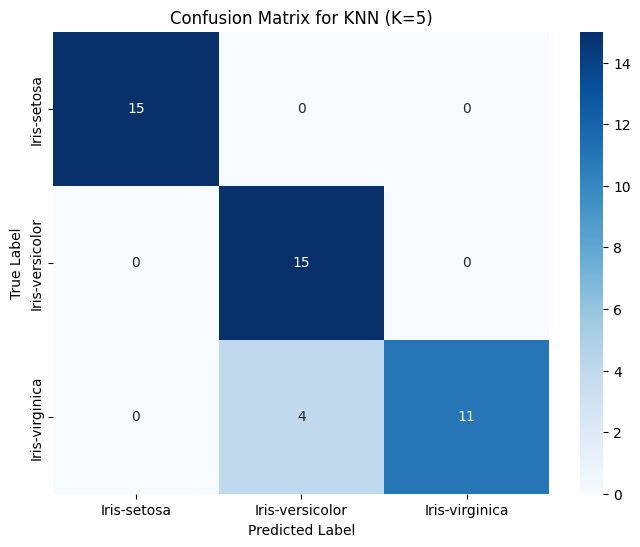

In [9]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Optimal K: {optimal_k}")
print(f"Model Accuracy: {accuracy*100:.2f}%")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix (Optional but recommended)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN (K={})'.format(optimal_k))
plt.savefig("confusion_matrix_knn.png")